1. What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

   - K-Means:
     - Need K Beforhand
     - Fast Speed
     - High scalability

    - Use Case:
       - Customer Segmentation in E-commerce

   - Hierarchial:
     - No Need K Beforehand
     - Slow Speed
     - Low-Medium scalability

    - Use Case:
       - Biology / Gene Expression Analysis

2. Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

   - Purposes of Silhouette Score:
     - Choose optimal number of clusters (K)
     - Compare algorithms
     - Detect poor clusters

3. What are the core parameters of DBSCAN, and how do they influence the
clustering process?

   - Core Parameters of DBSCAN (Density-Based Clustering):
     - eps (ε) — Neighborhood Radius
       - Small ε → many tiny clusters + many noise points
       - Medium ε → good clusters
       - Large ε → everything merges into 1 cluster

     - MinPts (Minimum Points)
       - Small MinPts → too many small clusters
       - Medium → meaningful clusters
       - Large → fewer clusters + more noise
      

4. Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

   - Distance fairness
     - Clustering uses distance metrics (Euclidean/Manhattan).

   - Prevents dominance of large-scale features
     - Features with large values (e.g., salary ₹100000) dominate small ones (e.g., age 25).

   - Improves K-Means centroid accuracy
     - K-Means calculates centroids (means).

   - Makes DBSCAN’s eps meaningful
     - Without scaling, eps becomes too small/large relative to features.

   - Faster convergence
     - Normalized data reduces numerical instability.

5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

   - The Elbow Method is a technique used to find the optimal number of clusters (K) for K-means clustering.

   - How Elbow Method Works:
     - Run K-Means for different K values
     - Compute WCSS for each K
     - Plot graph
     - Look for “Elbow” point

6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.

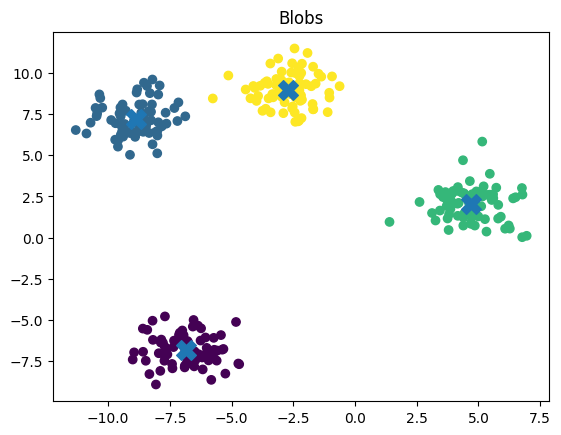

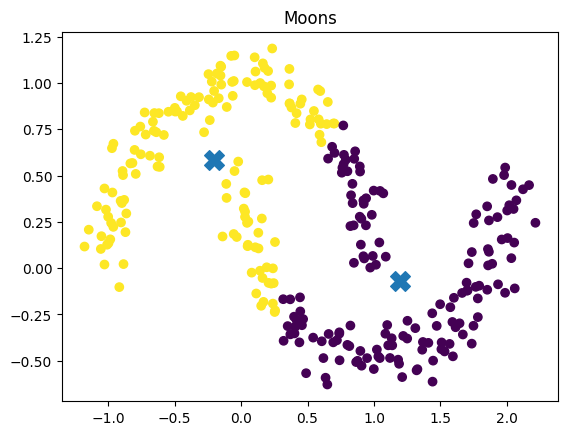

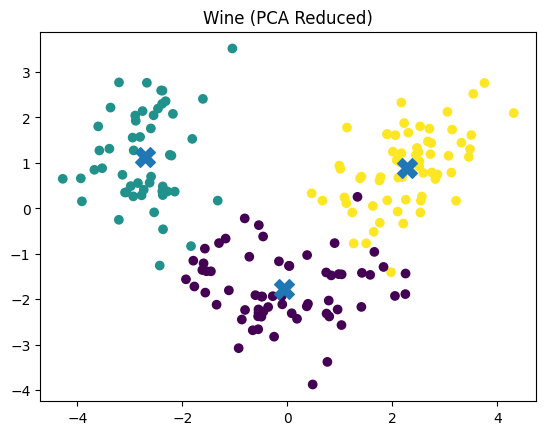

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------- BLOBS --------
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X_blobs)
centers = kmeans.cluster_centers_

plt.scatter(X_blobs[:,0], X_blobs[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.title("Blobs")
plt.show()


# -------- MOONS --------
X_moons, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X_moons)
centers = kmeans.cluster_centers_

plt.scatter(X_moons[:,0], X_moons[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.title("Moons")
plt.show()


# -------- WINE --------
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
centers2 = pca.transform(kmeans.cluster_centers_)

plt.scatter(X2[:,0], X2[:,1], c=labels)
plt.scatter(centers2[:,0], centers2[:,1], marker='X', s=200)
plt.title("Wine (PCA Reduced)")
plt.show()


7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.

In [2]:
from sklearn.datasets import load_wine, make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

def run_dbscan(X, eps=0.9, min_samples=5):
    # Scale features
    X_scaled = StandardScaler().fit_transform(X)

    # Train DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    # Count clusters (exclude -1 noise)
    n_clusters = len(set(labels) - {-1})
    n_noise = list(labels).count(-1)

    return n_clusters, n_noise


# ----- Wine -----
wine = load_wine()
print("Wine:", run_dbscan(wine.data))

# ----- Blobs -----
X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42)
print("Blobs:", run_dbscan(X_blobs))

# ----- Moons -----
X_moons, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
print("Moons:", run_dbscan(X_moons))


Wine: (0, 178)
Blobs: (3, 0)
Moons: (1, 0)


8. Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


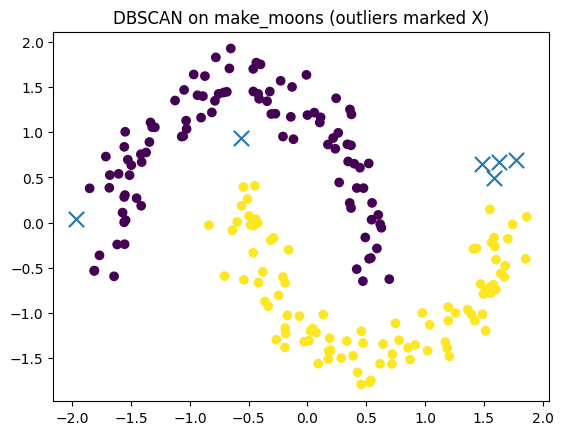

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate moons
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Masks
noise = labels == -1
clusters = labels != -1

# Plot
plt.scatter(X_scaled[clusters,0], X_scaled[clusters,1], c=labels[clusters])
plt.scatter(X_scaled[noise,0], X_scaled[noise,1], marker='x', s=120)

plt.title("DBSCAN on make_moons (outliers marked X)")
plt.show()


9. Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

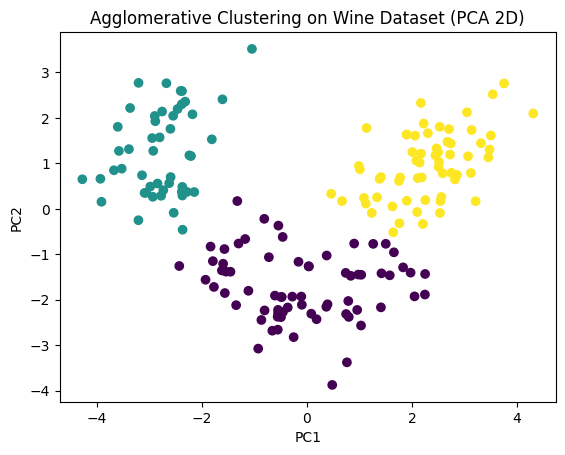

Clusters: 3


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load data
wine = load_wine()
X = wine.data

# Scale
X_scaled = StandardScaler().fit_transform(X)

# PCA → 2D
X_2d = PCA(n_components=2).fit_transform(X_scaled)

# Agglomerative clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_2d)

# Plot
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.show()

print("Clusters:", len(set(labels)))


10. You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

    1. Customer Segmentation using Clustering (End-to-End Workflow):
       - Understand the Business Goal
         - Group customers with similar buying behavior
         - send targeted offers
         - personalize ads
       - Example features:
         - Age, Gender, Location
         - Total spending

    2. Choose Clustering Algorithm(s):
       - K-means clustering
      - Why:
        - Fast for large e-commerce datasets (millions of users)
        - Easy to interpret
        - Works well with numeric behavioral features

    3. Data Preprocessing:
       - Numerical → mean/median imputation
       - Categorical → mode or “Unknown”
       - Drop rows only if too many missing
      - Feature Engineering:
        - RFM (Recency, Frequency, Monetary)
        - Avg basket size
        - Category proportions

    4. Determine Optimal Clusters:
       - Elbow Method
         - Plot WCSS vs K → look for bend
       - Silhouette Score
         - Choose highest score
       - Business interpretability
         - 4–6 segments (easy to act on)

    5. Business Impact (Marketing Benefits):
       - Targeted promotions
         - VIP → premium offers
         - Bargain → discounts

       - Better ROI
         - No mass advertising → personalized marketing

       - Customer retention
         - Identify churn-risk users early

       - Cross-selling
         - Recommend relevant products

       - Budget optimization
         - Spend more on high-value segments
        